In [ ]:
#Is there a relationship between water salinity & water temperature? 
#Can you predict the water temperature based on salinity?  Kaggle data bottle.csv

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
dataset=pd.read_csv(r'C:\Users\hp\Desktop\python\bottle1.csv')
dataset.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_8816\2590115348.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset=pd.read_csv(r'C:\Users\hp\Desktop\python\bottle1.csv')


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
dataset['R_TEMP'].isna().sum()

0

In [14]:
dataset['R_SALINITY'].isna().sum()

0

In [15]:
x=dataset.loc[:,'R_SALINITY']
y=dataset.loc[:,'R_TEMP']

In [16]:
x1=pd.DataFrame(x)
y1=pd.DataFrame(y)

In [17]:
x1.head()

,R_SALINITY
0,33.440
1,33.440
2,33.437
3,33.420
4,33.421


In [18]:
y1.head()

,R_TEMP
0,10.50
1,10.46
2,10.46
3,10.45
4,10.45


In [ ]:
# data devide into training and testing
... sklearn is Library, model_selection is the sub library , train_test_split is the module

In [22]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [24]:
y1_train

,R_TEMP
87031,4.30
42195,4.61
478241,14.07
253676,10.21
34,9.06
...,...
259178,7.59
365838,13.33
131932,13.11
671155,12.37


In [25]:
 from sklearn.linear_model import LinearRegression

In [26]:
lin_reg=LinearRegression()  # created model lin_reg

In [27]:
lin_reg.fit(x1_train,y1_train)

LinearRegression()

In [30]:
pred=lin_reg.predict(x1_test)

In [31]:
pred

array([[ 7.81993438],
       [ 7.27062659],
       [ 8.82242109],
       ...,
       [10.69006756],
       [ 9.51821095],
       [ 8.76291274]])

In [32]:
from sklearn.metrics import r2_score

In [34]:
r2_score(y1_test,pred)

0.2393476646011512

In [ ]:
# demonstration

In [35]:
dataset.shape

(864863, 74)

<AxesSubplot:xlabel='R_SALINITY', ylabel='R_TEMP'>

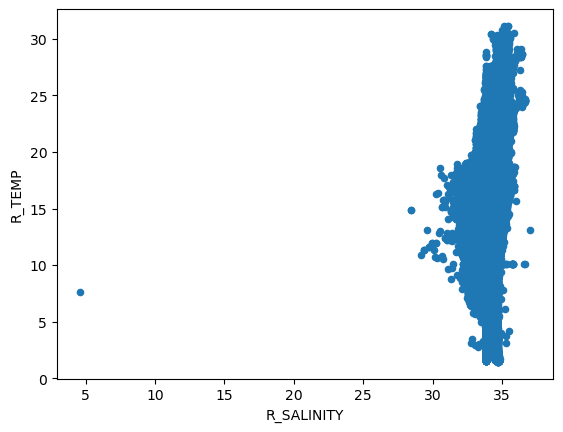

In [36]:
dataset.plot(kind='scatter',x='R_SALINITY', y='R_TEMP')

In [37]:
dataset.corr()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
Cst_Cnt,1.000000,0.999345,-0.162222,0.089329,-0.198024,0.156096,-0.089902,0.136510,0.147493,-0.026749,...,0.005807,-0.040576,-0.161961,-0.604945,-0.036155,-0.097938,-0.075060,-0.115212,-0.262587,0.020778
Btl_Cnt,0.999345,1.000000,-0.161617,0.090118,-0.195207,0.154219,-0.089521,0.134732,0.145498,-0.027514,...,0.009648,-0.035778,-0.161348,-0.595142,-0.035516,-0.097251,-0.074255,-0.114165,-0.259082,0.020315
Depthm,-0.162222,-0.161617,1.000000,-0.681201,0.572630,-0.592399,0.582710,-0.595547,-0.589175,-0.681935,...,-0.279636,-0.201450,0.999994,-0.018605,0.567855,0.572374,0.786873,0.866185,0.223304,-0.611798
T_degC,0.089329,0.090118,-0.681201,1.000000,-0.505266,0.795700,-0.829155,0.850596,0.795543,0.750413,...,0.108925,0.014987,-0.679852,0.006503,-0.936239,-0.949972,-0.742196,-0.889635,0.547436,0.743735
Salnty,-0.198024,-0.195207,0.572630,-0.505266,1.000000,-0.823870,0.603470,-0.790231,-0.824338,-0.693341,...,-0.029373,-0.003063,0.571405,-0.000758,0.938153,0.955942,0.895124,0.937147,0.583807,0.106417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DIC2,-0.097938,-0.097251,0.572374,-0.949972,0.955942,-0.941214,0.965546,-0.962977,-0.941528,-0.958549,...,0.024819,0.220101,0.570633,-0.026912,0.991091,1.000000,0.885735,0.888669,NaN,NaN
TA1,-0.075060,-0.074255,0.786873,-0.742196,0.895124,-0.802493,0.779899,-0.788291,-0.802435,-0.737828,...,0.006186,-0.010690,0.785334,0.025613,0.853682,0.885735,1.000000,0.994924,0.616844,0.260047
TA2,-0.115212,-0.114165,0.866185,-0.889635,0.937147,-0.726460,0.887778,-0.767766,-0.727023,-0.828905,...,0.265152,0.235116,0.865140,0.020177,0.883278,0.888669,0.994924,1.000000,0.578090,0.577613
pH2,-0.262587,-0.259082,0.223304,0.547436,0.583807,0.174204,-0.480397,0.732628,0.180058,-0.457365,...,0.047099,0.049127,0.223304,-0.457365,NaN,NaN,0.616844,0.578090,1.000000,0.995913
